# Análise do Conjunto de Dados Sobre Hábitos de Fumar no Reino Unido

Este Jupyter Notebook contém uma análise de um conjunto de dados sobre hábitos de fumar, incluindo a preparação de dados, análise exploratória e treinamento de um modelo de aprendizado de máquina.

## 1. Preparação de Dados
O notebook começa com a importação das bibliotecas necessárias, incluindo `pandas`, `numpy`, `matplotlib`, `seaborn` e várias do sklearn. Em seguida, os dados são carregados de um arquivo CSV. Após a leitura do arquivo, valores ausentes no conjunto de dados são tratados preenchendo-os com 0 nas colunas `'amt_weekends'` e `'amt_weekdays'`. A coluna `'type'` é removida e a coluna `'Unnamed: 0'` é renomeada para `'ids'`. Depois disso, o conjunto de dados é exibido para verificar se os passos foram executados corretamente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("smoking.csv")
df.replace("NA", np.nan, inplace=True)


In [3]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [5]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [6]:
print(df.isnull().sum())

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [7]:
df=df.copy()
df['amt_weekends']=df['amt_weekends'].fillna(0).astype(int)
df['amt_weekdays']=df['amt_weekdays'].fillna(0).astype(int)
df.drop(columns=['type'], inplace=True)
df = df.rename(columns={'Unnamed: 0': 'ids'})


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [9]:
print('Dimensões do dataframe:', df.shape)
print('Quantidade de valores faltantes:', df.isna().sum().sum())

Dimensões do dataframe: (1691, 12)
Quantidade de valores faltantes: 0


## 2. Análise Exploratória de Dados
A análise exploratória dos dados é iniciada examinando a estrutura do conjunto de dados e a distribuição de várias características. Isso é feito por meio da criação de uma série de gráficos de distribuição para as características `'gender'`, `'age'`, `'ethnicity'`, `'highest_qualification'`, `'nationality'`, `'amt_weekends'`, e `'marital_status'`.

A análise é então aprofundada, criando um subconjunto do conjunto de dados que contém apenas fumantes e analisando a distribuição das mesmas características para esse subconjunto.



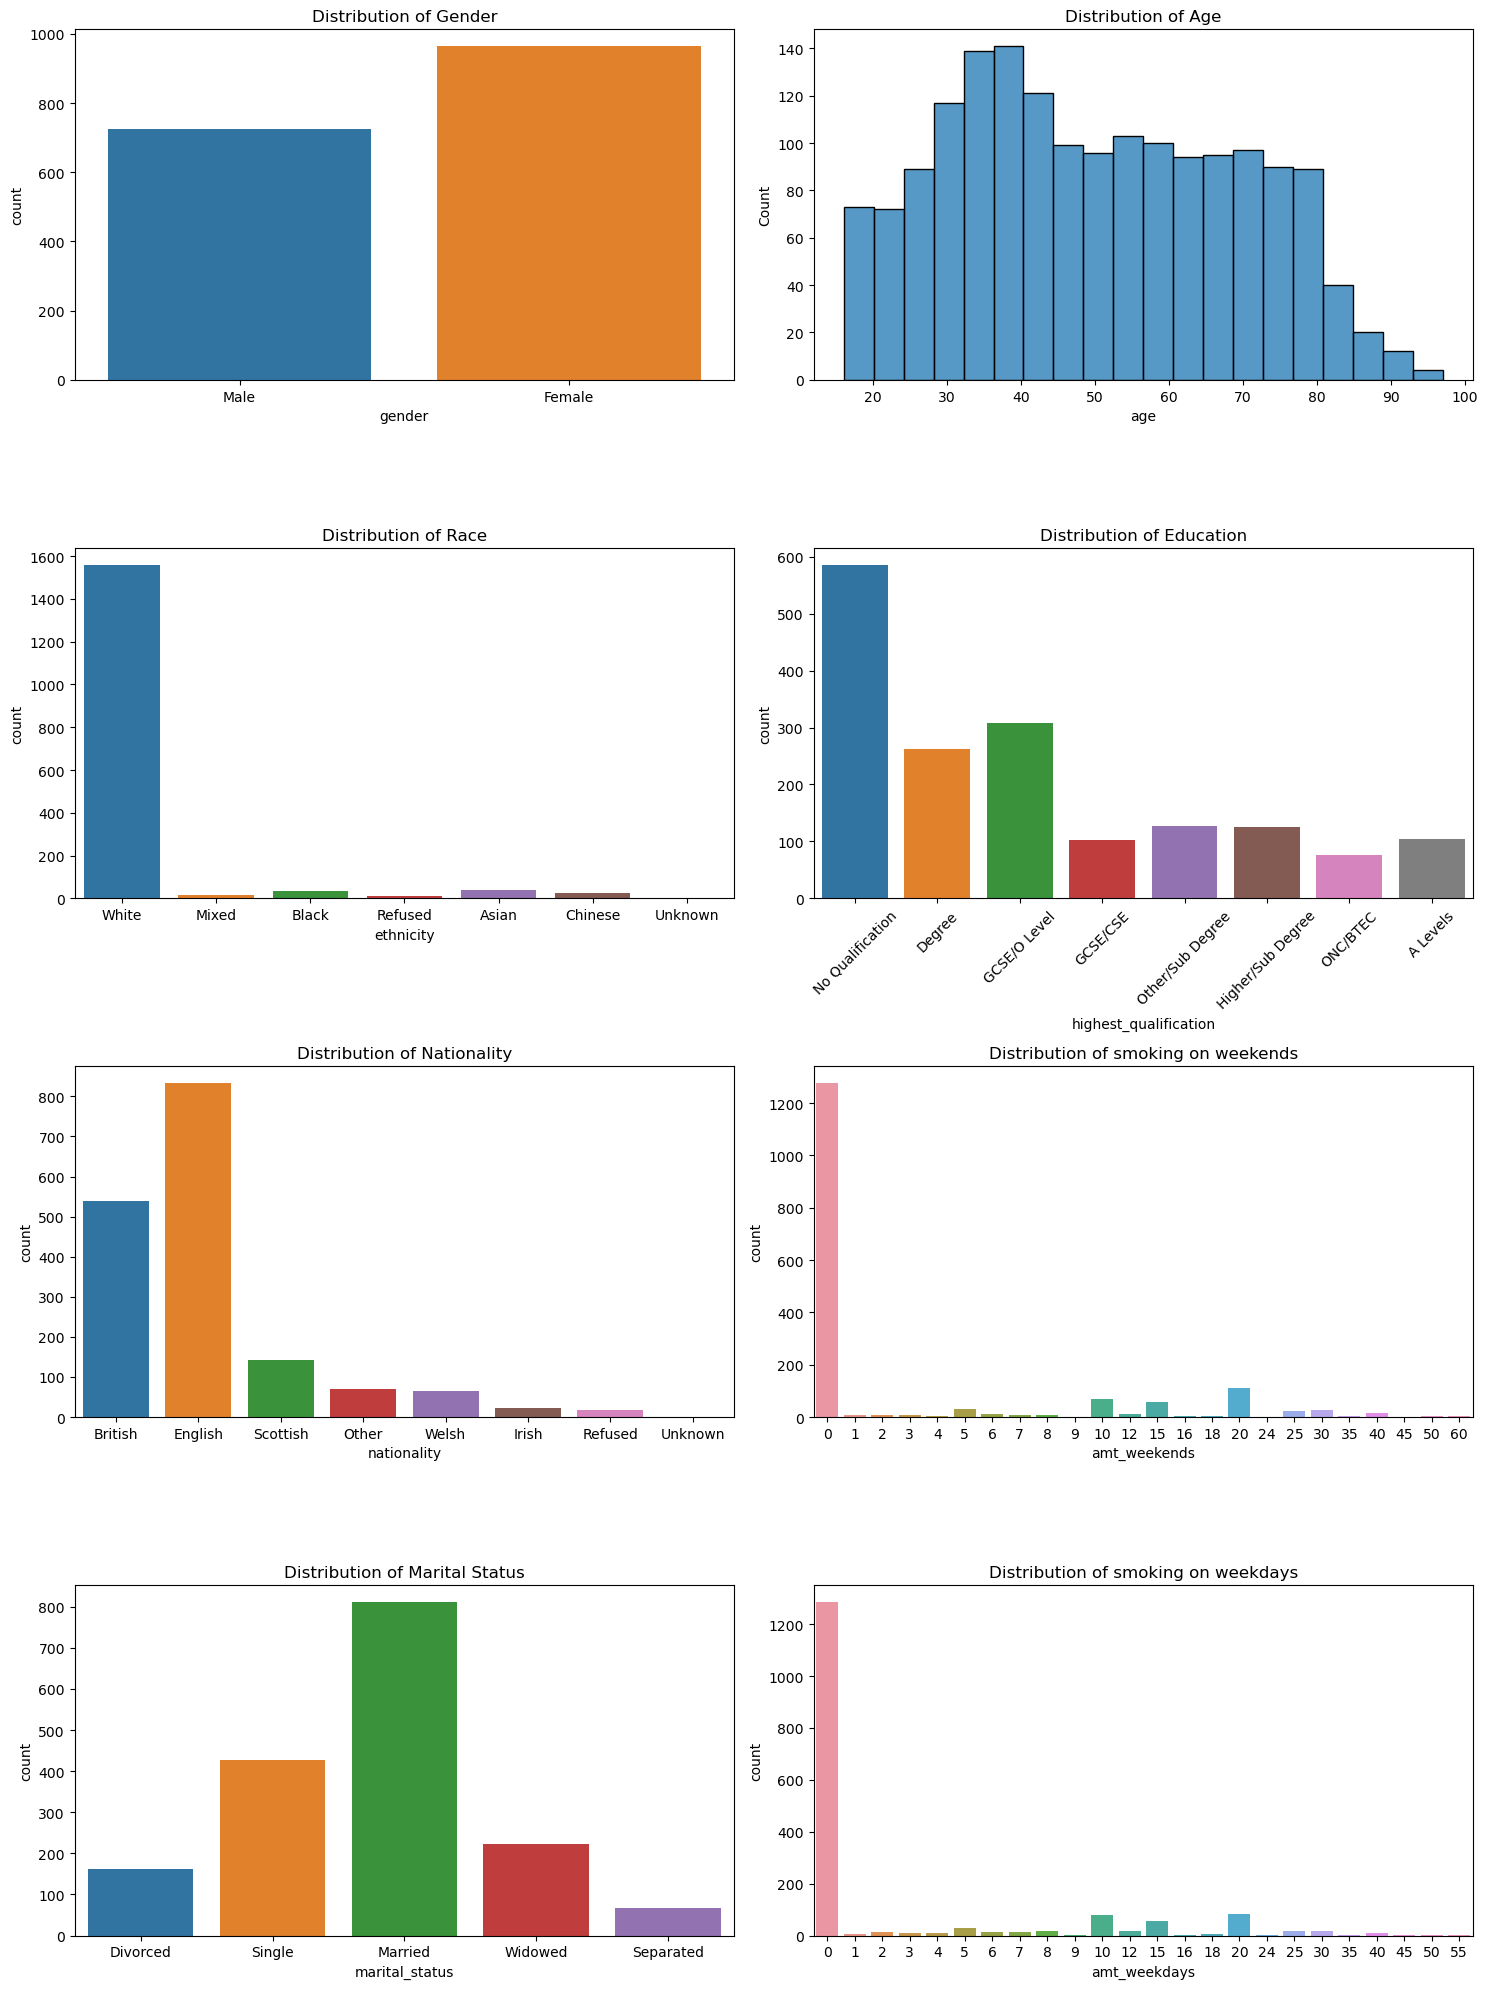

In [10]:
data= df
fig, axs = plt.subplots(4, 2, figsize=(15,20)) # Criamos uma grade de 4 linhas e 2 colunas de subplots

# Distribuição de gênero
sns.countplot(data=data, x='gender', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Gender')

# Distribuição de idade
sns.histplot(data=data, x='age', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribuição de raça
sns.countplot(data=data, x='ethnicity', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Race')

# Distribuição de educação
sns.countplot(data=data, x='highest_qualification', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Education')
axs[1, 1].tick_params(axis='x', rotation=45)

# Distribuição de país
sns.countplot(data=data, x='nationality', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Nationality')

# Distribuição de dependência de nicotina
sns.countplot(data=data, x='amt_weekends', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of smoking on weekends')

# Distribuição do estado civil
sns.countplot(data=data, x='marital_status', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of Marital Status')

# Distribuição de dependência de nicotina
sns.countplot(data=data, x='amt_weekdays', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of smoking on weekdays')

plt.tight_layout()
plt.show()



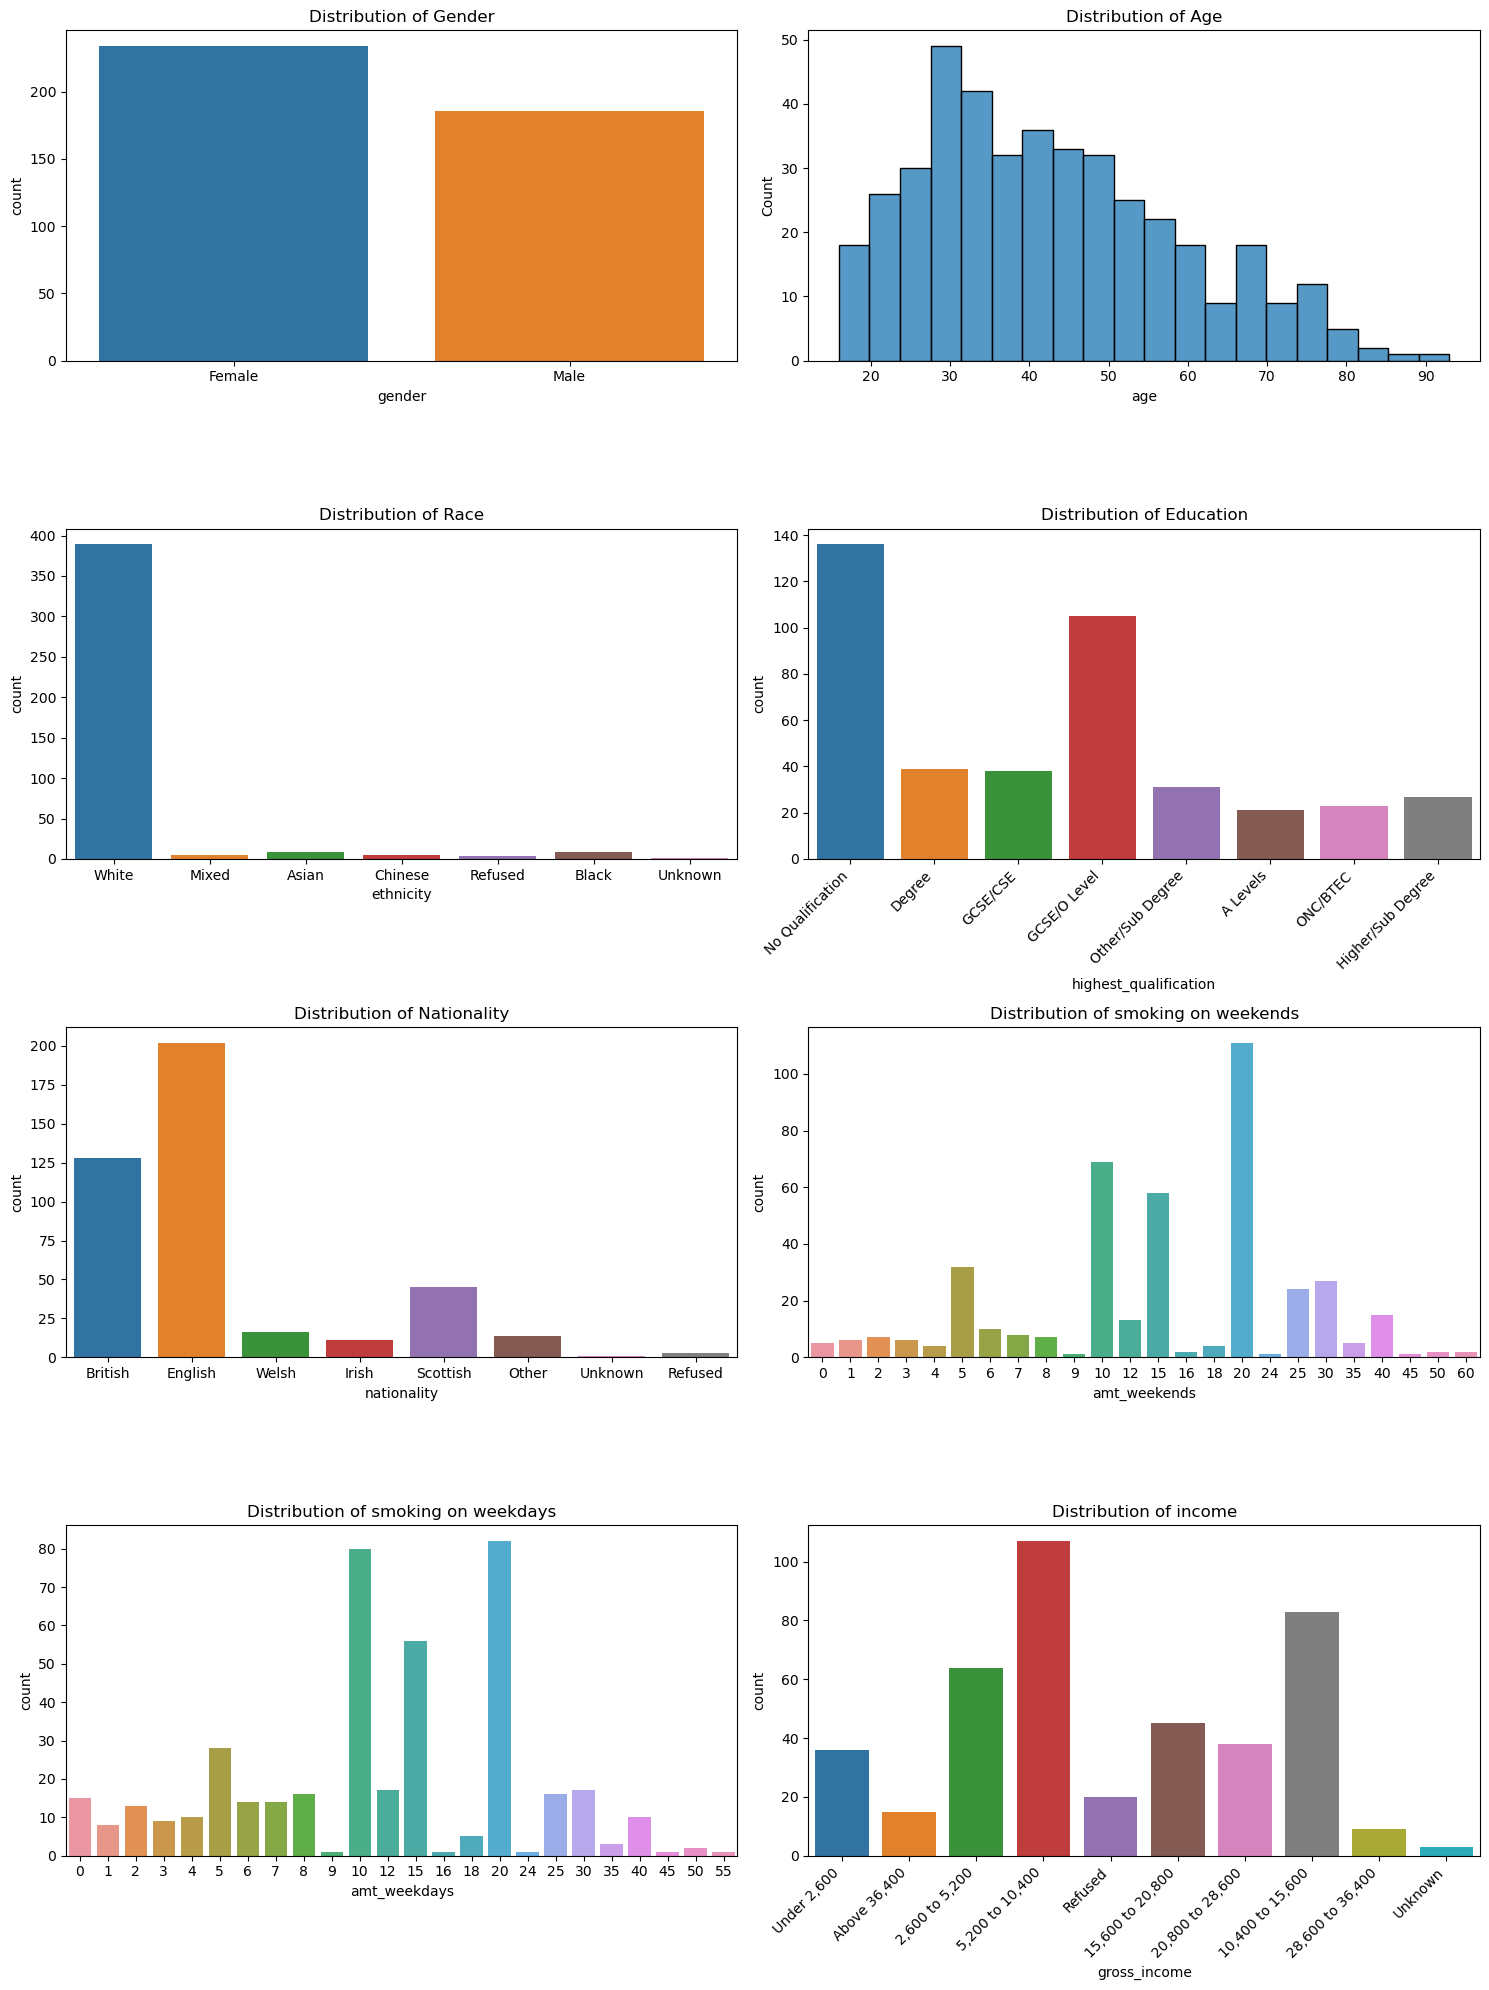

In [11]:
only_smokers = df[(df['amt_weekdays'] > 0) | (df['amt_weekends'] > 0)]
data = only_smokers

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Distribution of gender
sns.countplot(data=data, x='gender', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Gender')

# Distribution of age
sns.histplot(data=data, x='age', bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribution of race
sns.countplot(data=data, x='ethnicity', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Race')

# Distribution of education
sns.countplot(data=data, x='highest_qualification', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Education')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

# Distribution of country
sns.countplot(data=data, x='nationality', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Nationality')

# Distribution of nicotine dependence
sns.countplot(data=data, x='amt_weekends', ax=axs[2, 1])
axs[2, 1].set_title('Distribution of smoking on weekends')

# Distribution of smoking status
sns.countplot(data=data, x='amt_weekdays', ax=axs[3, 0])
axs[3, 0].set_title('Distribution of smoking on weekdays')

# Distribution of income
sns.countplot(data=data,x='gross_income', ax=axs[3, 1])
axs[3, 1].set_title('Distribution of income')
axs[3, 1].set_xticklabels(axs[3, 1].get_xticklabels(), rotation=45, ha='right')

# Add spacing
fig.tight_layout()

plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


In [13]:
porcentage= (only_smokers.shape[0]/df.shape[0])*100
print(f"{porcentage:.2f}% do dataset é composto por fumantes")

24.84% do dataset é composto por fumantes


## 3. Preparação dos Dados para Aprendizado de Máquina
Nesta etapa, os dados são preparados para o treinamento de um modelo de aprendizado de máquina. O conjunto de dados é dividido em conjuntos de treinamento e teste, e um LabelEncoder é utilizado para converter dados categóricos em numéricos. Os recursos são então padronizados.

In [14]:
# Split the data

X = df.drop(columns=["smoke",'amt_weekdays','amt_weekends','ids'])
X = pd.get_dummies(X)
y = df["smoke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ids                    1691 non-null   int64 
 1   gender                 1691 non-null   object
 2   age                    1691 non-null   int64 
 3   marital_status         1691 non-null   object
 4   highest_qualification  1691 non-null   object
 5   nationality            1691 non-null   object
 6   ethnicity              1691 non-null   object
 7   gross_income           1691 non-null   object
 8   region                 1691 non-null   object
 9   smoke                  1691 non-null   object
 10  amt_weekends           1691 non-null   int64 
 11  amt_weekdays           1691 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 158.7+ KB


## 4. Aprendizado de Máquina
Um modelo de Regressão Logística é treinado no conjunto de dados e são feitas previsões no conjunto de testes. O desempenho do modelo é avaliado por meio de um relatório de classificação e uma pontuação de precisão. A importância dos recursos (coeficientes) do modelo também é impressa.

Um gráfico de histograma da distribuição dos coeficientes dos recursos é criado, mostrando a importância relativa dos diferentes recursos para a previsão do modelo.

In [16]:
model = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [17]:
print(classification_report(y_test, predictions))

print("Accuracy:", score*100,"%")

              precision    recall  f1-score   support

          No       0.76      1.00      0.86       258
         Yes       0.00      0.00      0.00        81

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339

Accuracy: 76.10619469026548 %


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    if v != 0:
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.02118
Feature: 2, Score: 0.09106
Feature: 3, Score: 0.12094
Feature: 4, Score: -0.43358
Feature: 9, Score: -0.46755
Feature: 30, Score: 0.03928
Feature: 31, Score: 0.14444
Feature: 36, Score: 0.10185
Feature: 43, Score: 0.11508


In [19]:


n = int(1e3)

num_features = X_train.shape[1]
dic_test = {i: [] for i in range(num_features)}

for _ in range(n):
    # mexer no C pra ver conclusoes
    model = LogisticRegression(penalty='l1', C=1e6, solver='liblinear')
    model.fit(X_train, y_train)
    importance = model.coef_[0]
    
    for e, v in enumerate(importance):
        dic_test[e].append(v)  




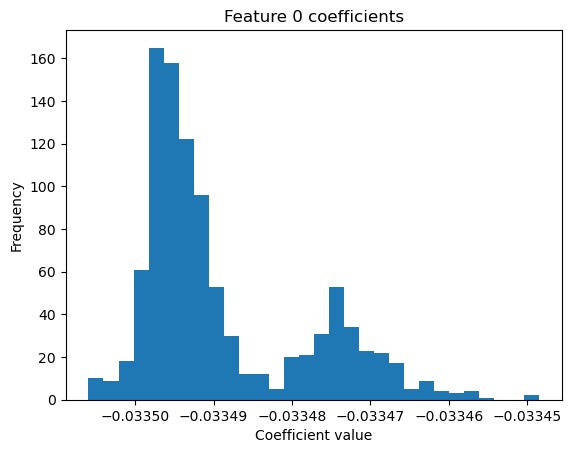

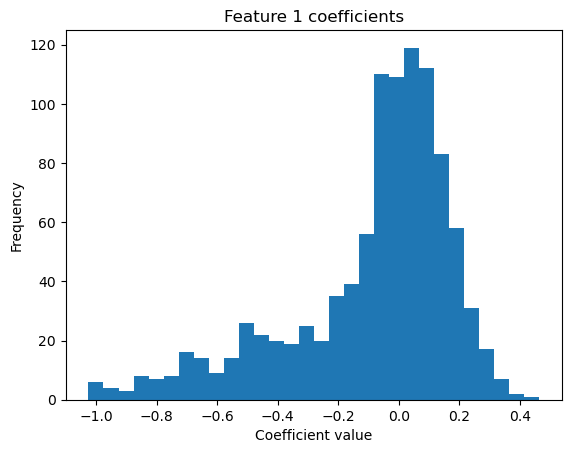

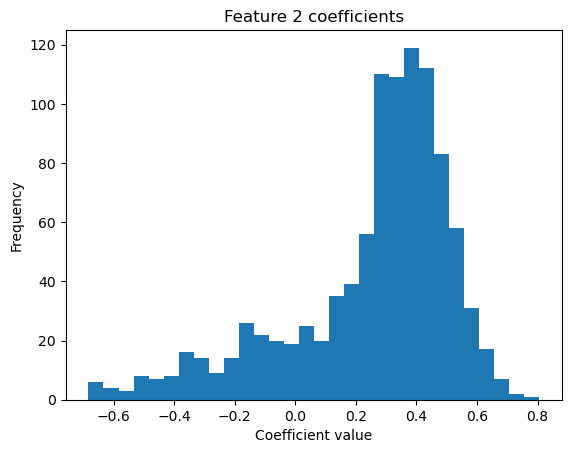

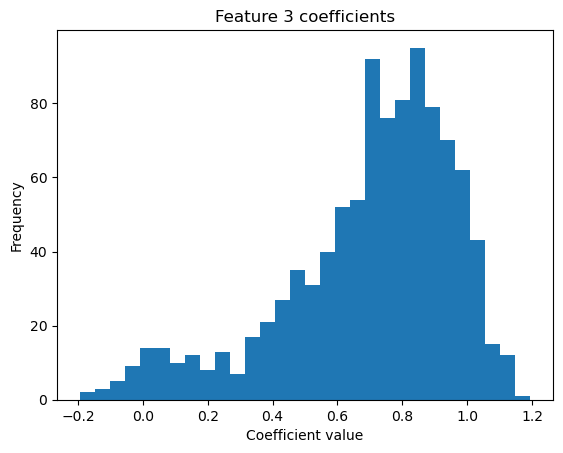

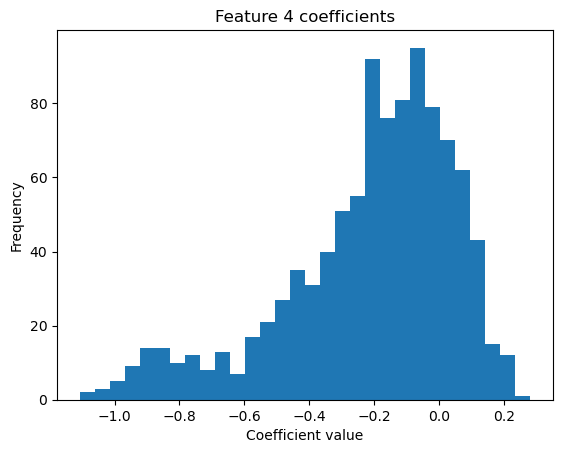

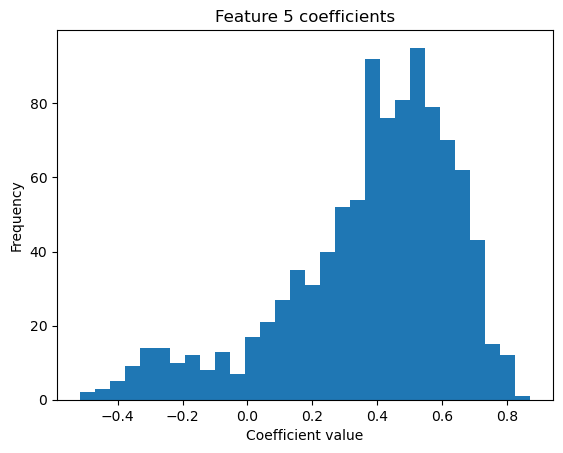

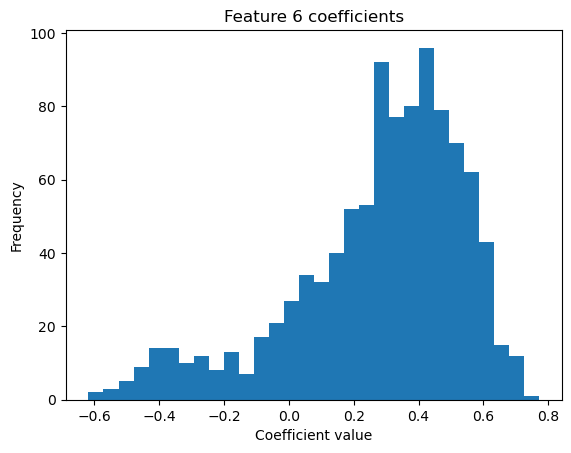

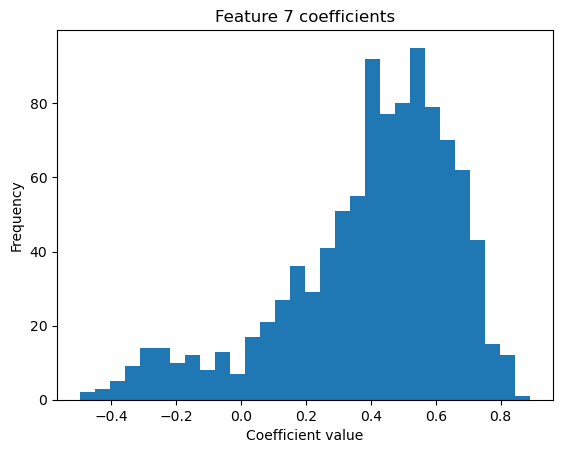

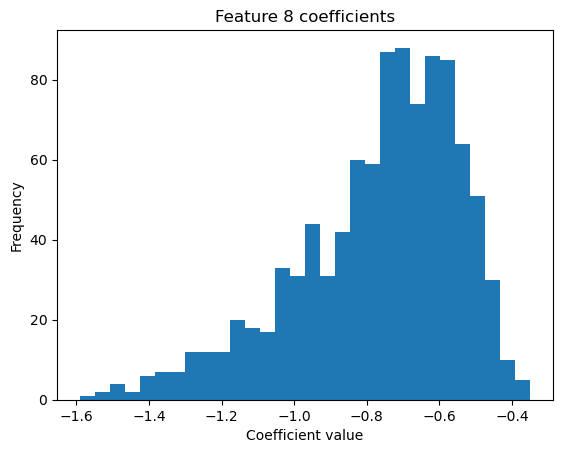

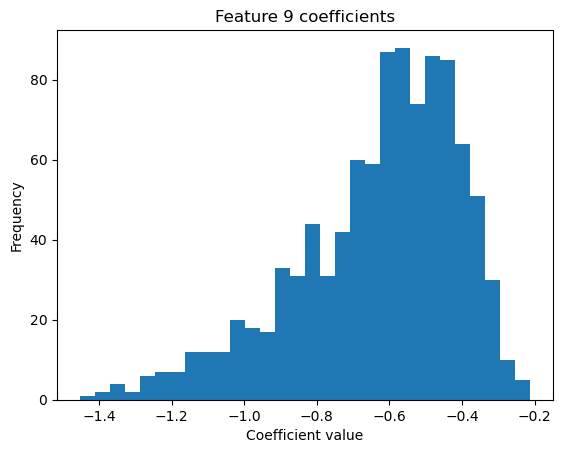

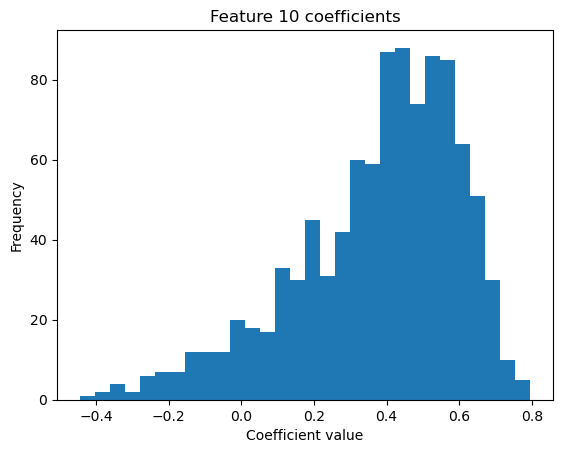

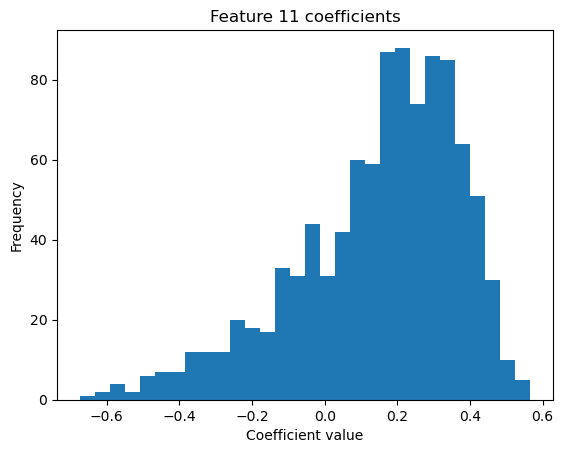

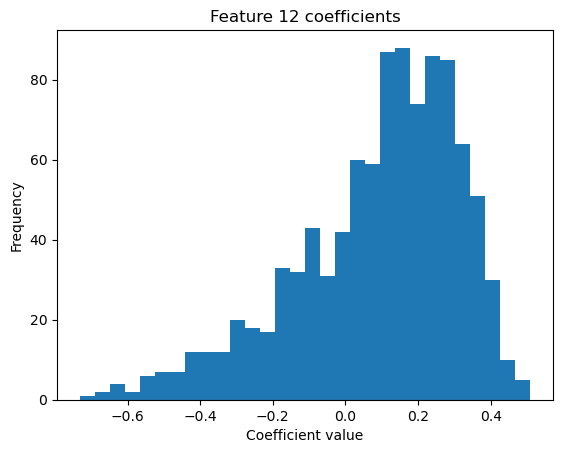

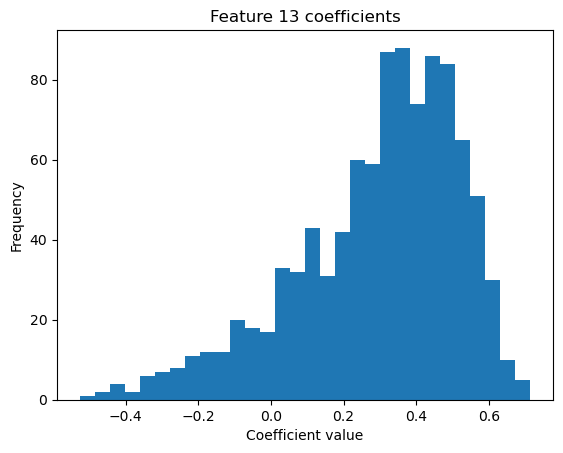

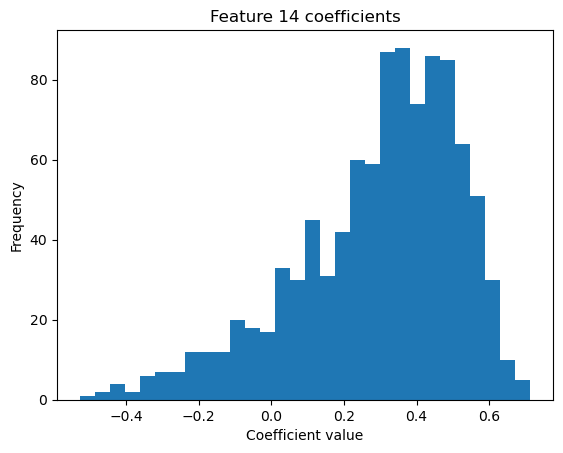

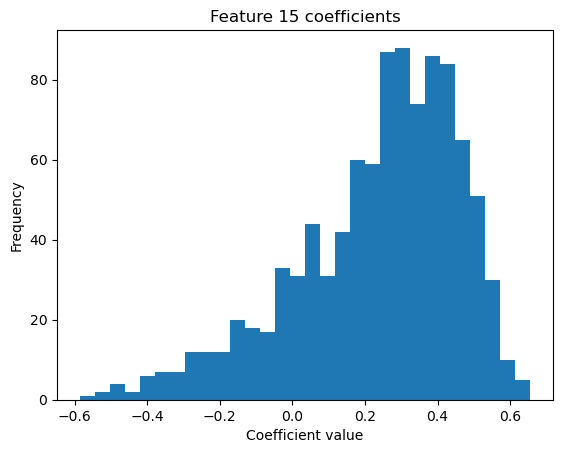

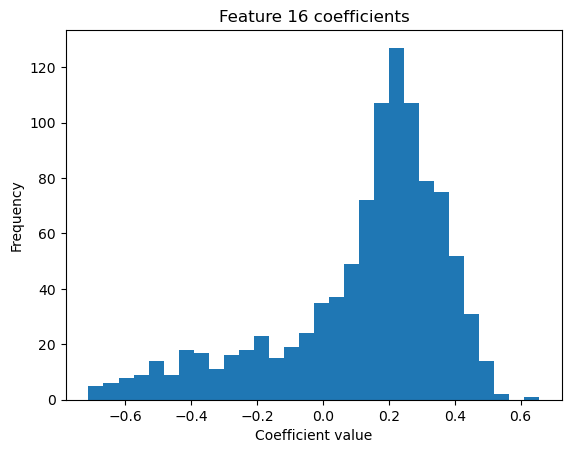

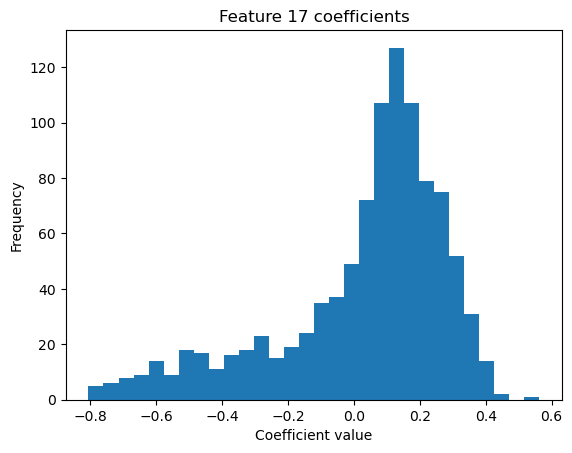

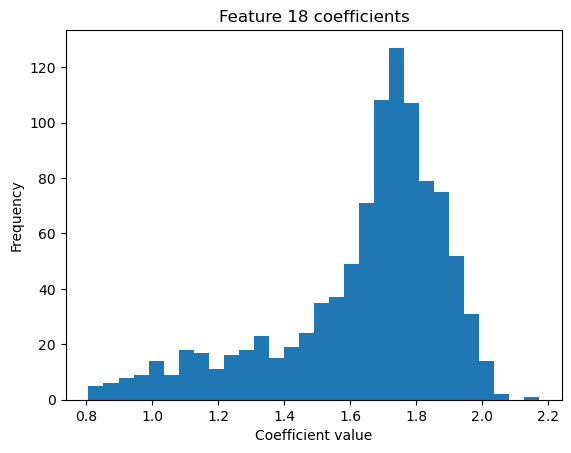

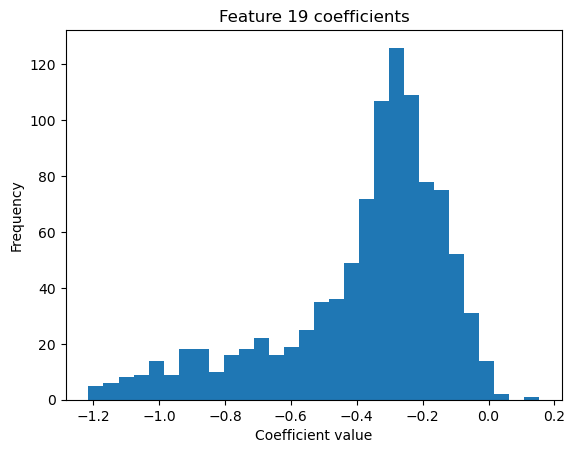

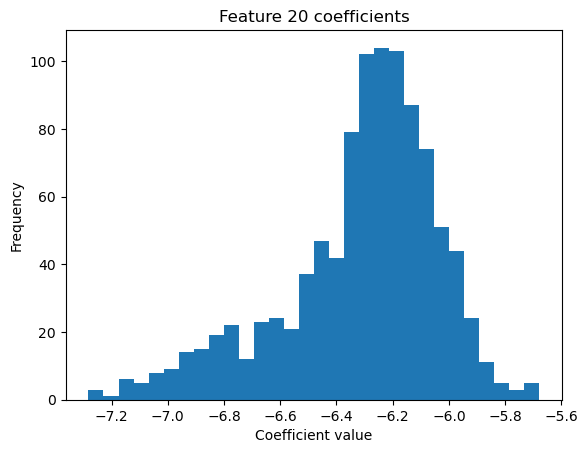

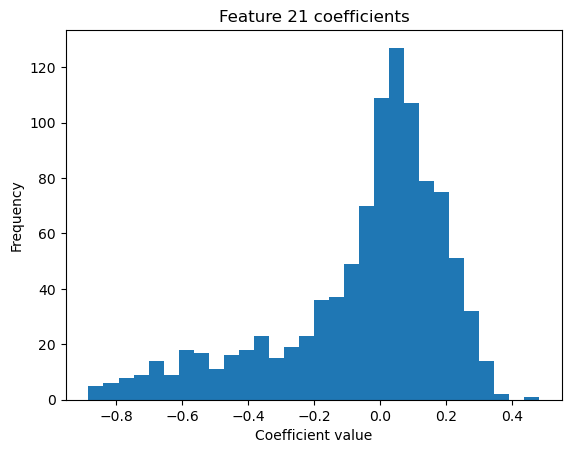

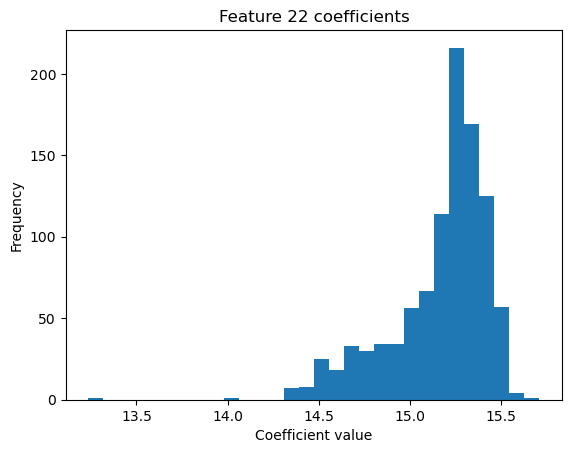

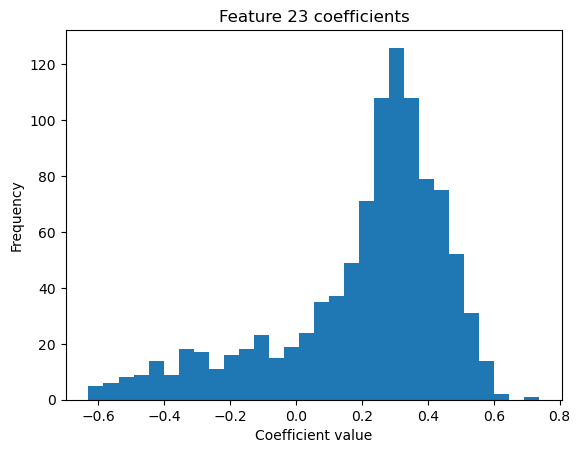

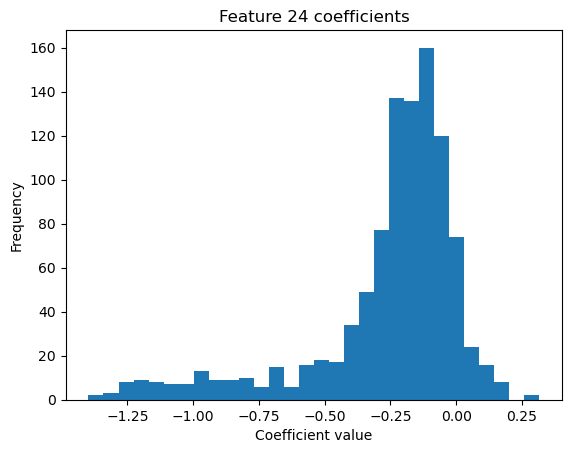

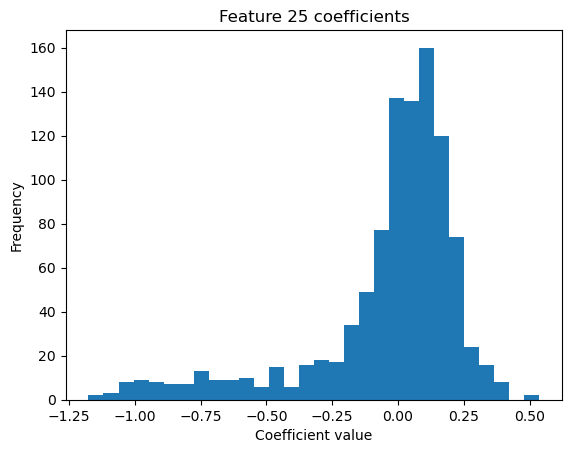

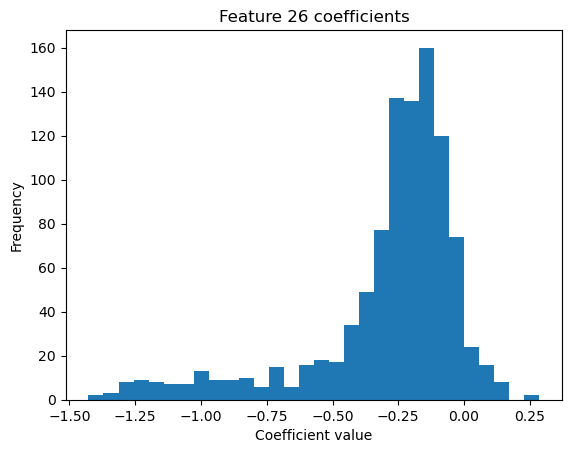

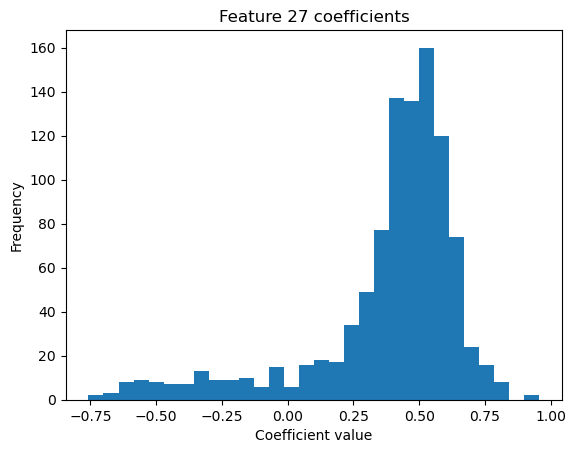

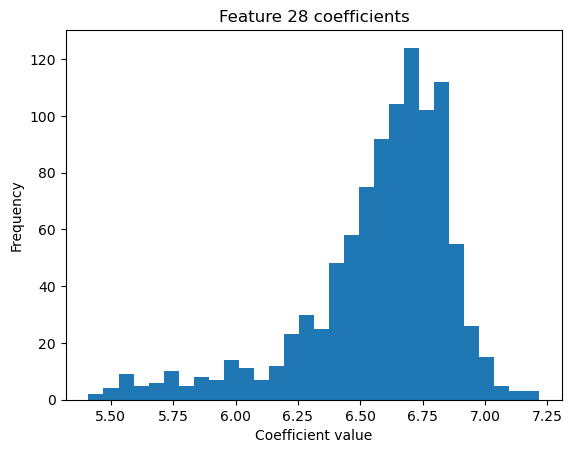

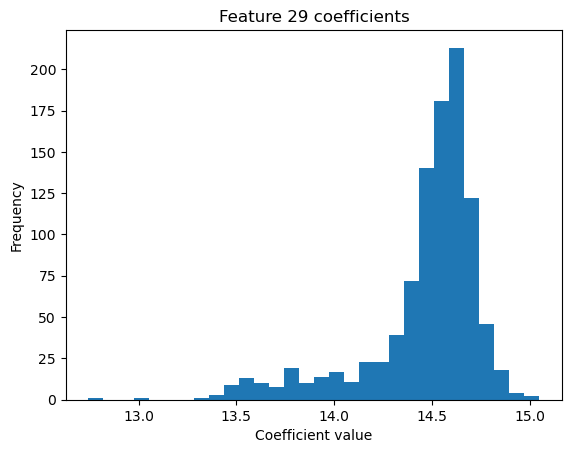

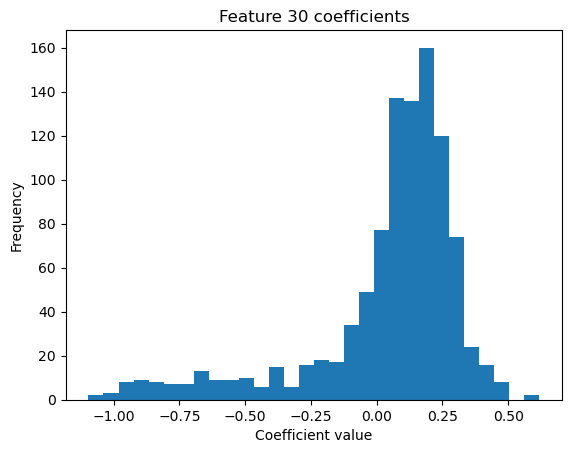

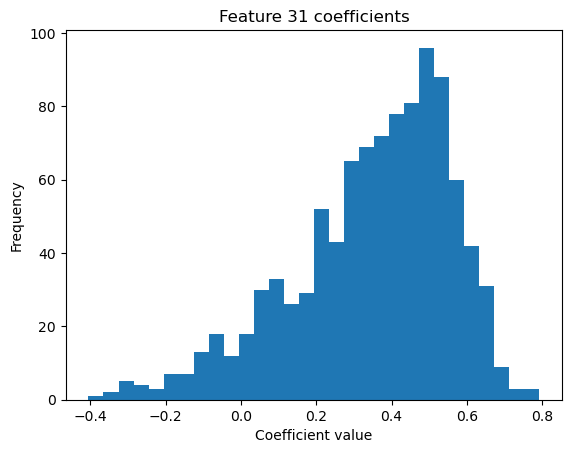

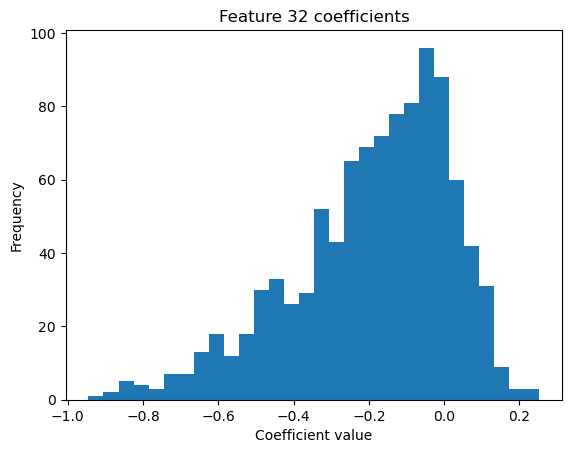

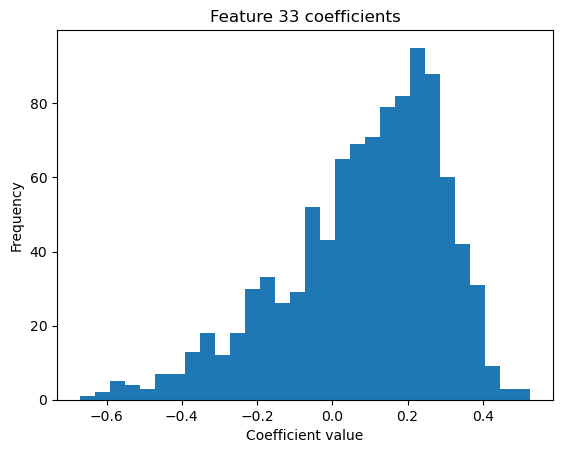

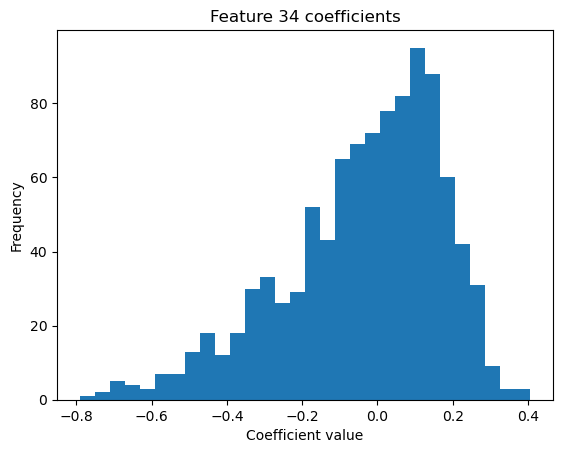

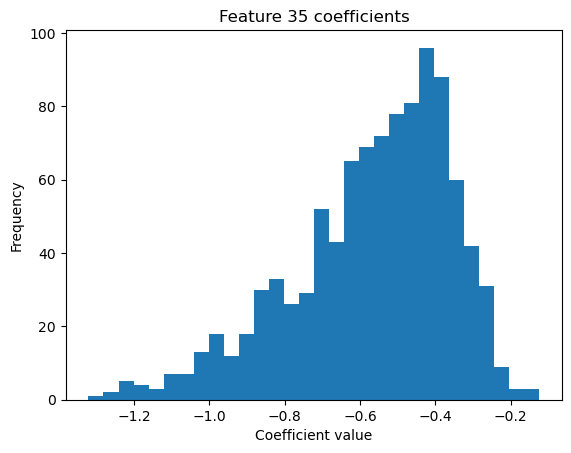

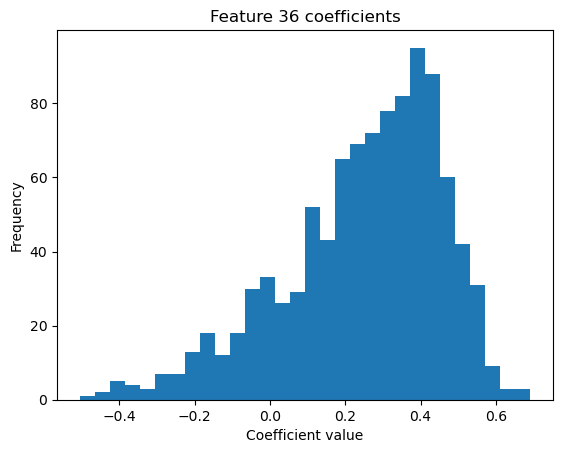

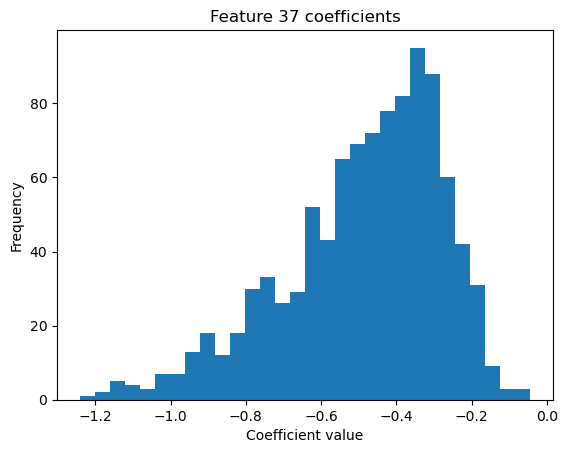

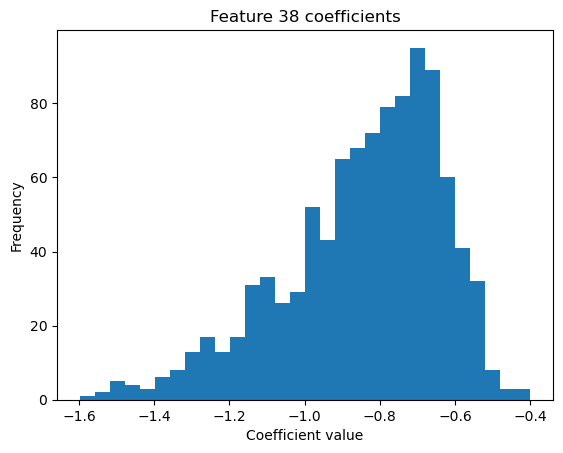

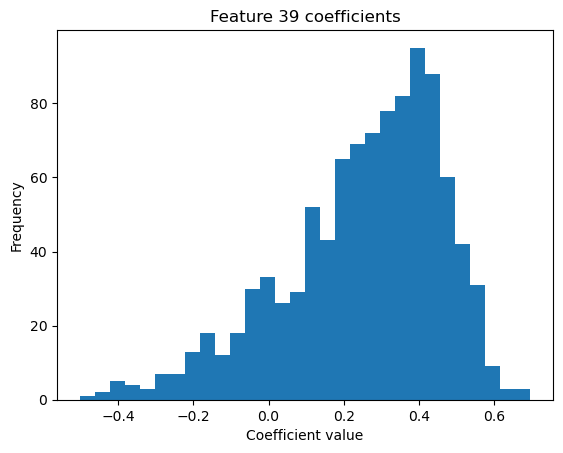

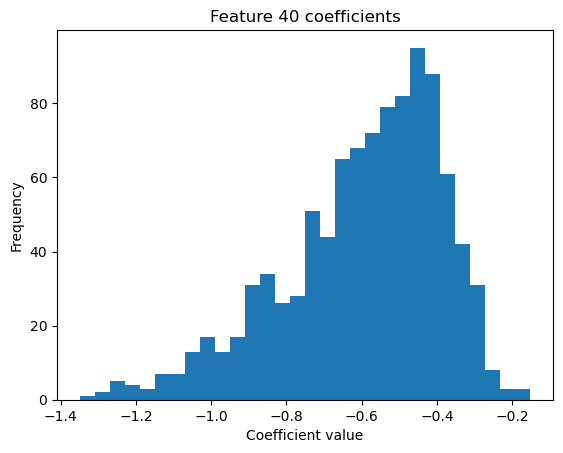

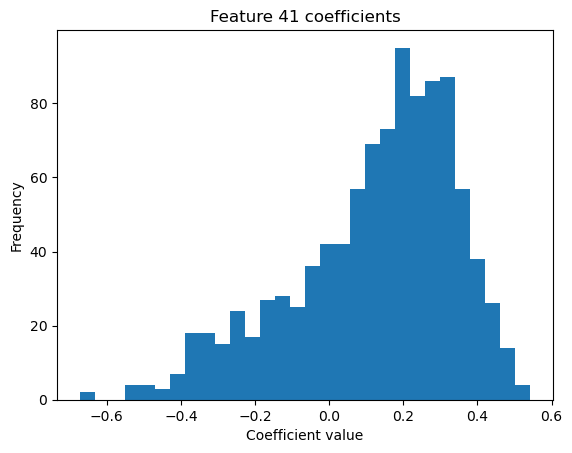

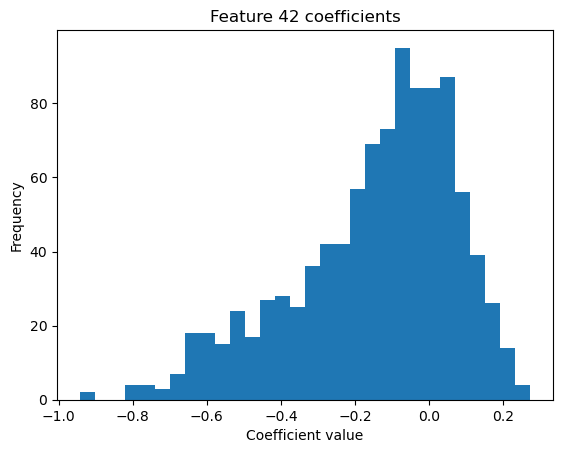

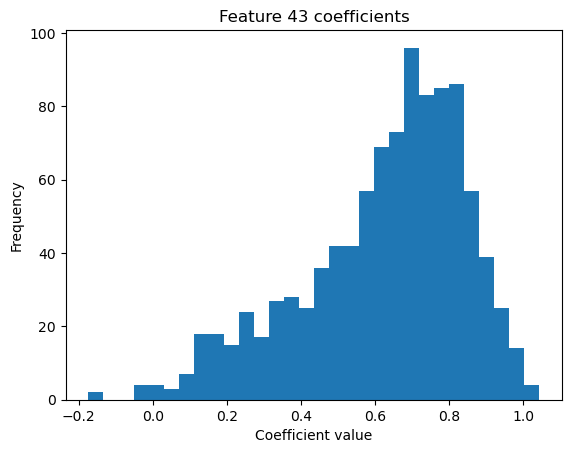

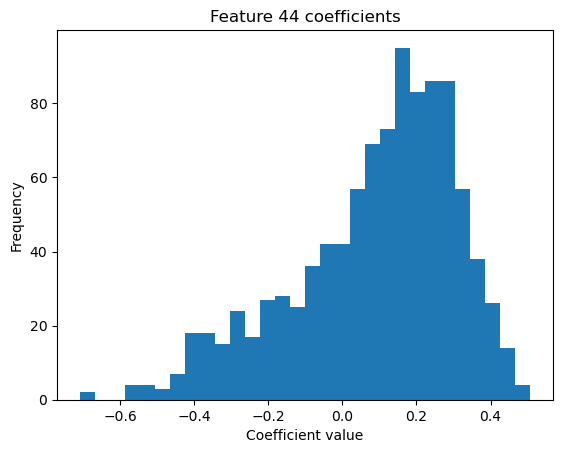

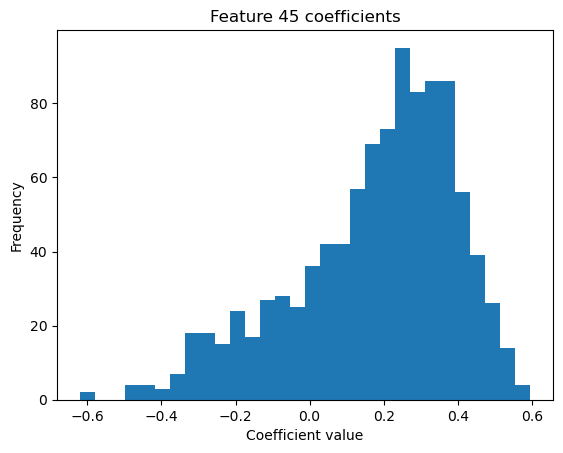

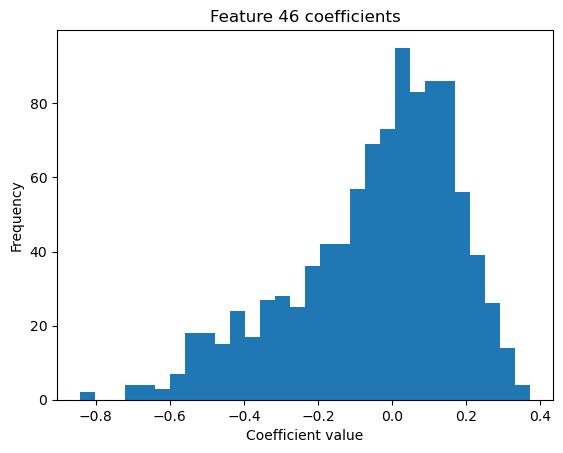

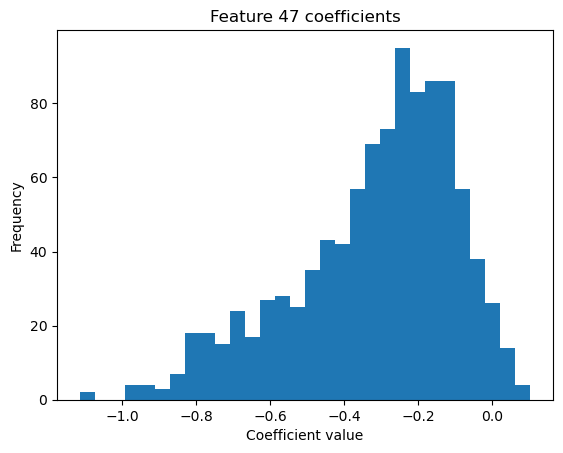

In [20]:

for feature, coefficients in dic_test.items():
    plt.figure()
    plt.hist(coefficients, bins=30)
    plt.title(f"Feature {feature} coefficients")
    plt.xlabel("Coefficient value")
    plt.ylabel("Frequency")
    plt.show()


In [21]:

model = LogisticRegression(penalty='l1',C=0.1, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

In [22]:

print(classification_report(y_test, predictions))

print("Accuracy:", score*100,"%")

              precision    recall  f1-score   support

          No       0.76      1.00      0.86       258
         Yes       0.00      0.00      0.00        81

    accuracy                           0.76       339
   macro avg       0.38      0.50      0.43       339
weighted avg       0.58      0.76      0.66       339

Accuracy: 76.10619469026548 %


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Get the feature importance (coefficients) of the model
importance = model.coef_[0]

# Print the feature importance scores
for i,v in enumerate(importance):
    if v != 0:
        print('Feature: %0d, Score: %.5f' % (i,v))



Feature: 0, Score: -0.02123
Feature: 2, Score: 0.09077
Feature: 3, Score: 0.12081
Feature: 4, Score: -0.43323
Feature: 9, Score: -0.46751
Feature: 30, Score: 0.04170
Feature: 31, Score: 0.14410
Feature: 36, Score: 0.10193
Feature: 43, Score: 0.11505


## 5. Conclusão
O notebook termina com uma visualização dos coeficientes de importância dos recursos e uma impressão da precisão do modelo. A partir disso, é possível inferir quais características são mais importantes para determinar se uma pessoa é fumante ou não, e também avaliar a precisão do modelo em prever essa característica com base nos dados fornecidos.